In [11]:
import time

import pandas as pd
from matplotlib import pyplot as plt
from PyARMViz import *

In [12]:
df = pd.read_csv('data/BreadBasket_DMS.csv')

transactions = df.groupby('Transaction')['Item'].apply(list).tolist()

total_transactions = len(transactions)

['Bread']
['Scandinavian', 'Scandinavian']
['Hot chocolate', 'Jam', 'Cookies']
['Muffin']
['Coffee', 'Pastry', 'Bread']
['Medialuna', 'Pastry', 'Muffin']
['Medialuna', 'Pastry', 'Coffee', 'Tea']
['Pastry', 'Bread']
['Bread', 'Muffin']
['Scandinavian', 'Medialuna']
['Bread', 'Medialuna', 'Bread', 'NONE']
['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea']
['Basket', 'Bread', 'Coffee']
['Bread', 'Medialuna', 'Pastry']
['NONE', 'NONE', 'Mineral water', 'Scandinavian']
['Bread', 'Medialuna', 'Coffee']
['Hot chocolate']
['Farm House']
['Farm House', 'Bread']
['Bread', 'Medialuna']
['Coffee', 'Coffee', 'Medialuna', 'Bread']
['Jam']
['Scandinavian', 'Muffin']
['Bread']
['Scandinavian']
['Fudge']
['Scandinavian']
['Coffee', 'Bread']
['Bread', 'Jam', 'NONE']
['Bread']
['Basket']
['Scandinavian', 'Muffin']
['Coffee']
['Coffee', 'Muffin']
['Muffin', 'Scandinavian']
['Tea', 'Bread']
['Coffee', 'Bread', 'NONE']
['Bread', 'Tea']
['Scandinavian']
['Juice', 'NONE', 'Tartine', 'Coffee', 'Muffin']
['Scandinav

In [13]:
times = {}

min_sup = 0.001

apriori

In [14]:
from apriori_python import apriori

start = time.time()
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.6)
times['apriori'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")
rules_pyarmviz = []   # список Rule для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    # считаем поддержку прямо по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    # создаём Rule для PyARMViz (нужны абсолютные counts)
    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )
PyARMViz.metadata_scatter_plot(rules_pyarmviz)         # scatter support/confidence/lift
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)        # интерактивный граф связей
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)  # параллельные координаты
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)    # параллельные категории



Ассоциативные правила (достоверность ≥ 60%):
0: {'Cake', 'Hot chocolate'} -> {'Coffee'} Support = 0.007 Confidence = 0.602 Lift = 1.267
1: {'Cookies', 'Juice'} -> {'Coffee'} Support = 0.004 Confidence = 0.603 Lift = 1.270
2: {'Bakewell'} -> {'Coffee'} Support = 0.003 Confidence = 0.604 Lift = 1.272
3: {'Granola'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
4: {'Cookies', 'Pastry'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
5: {'Scone', 'Hot chocolate'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
6: {'NONE', 'Brownie'} -> {'Coffee'} Support = 0.001 Confidence = 0.609 Lift = 1.281
7: {'NONE', 'Alfajores'} -> {'Coffee'} Support = 0.001 Confidence = 0.611 Lift = 1.286
8: {'Toast', 'Medialuna'} -> {'Coffee'} Support = 0.001 Confidence = 0.611 Lift = 1.286
9: {'Cookies', 'Hot chocolate'} -> {'Coffee'} Support = 0.004 Confidence = 0.614 Lift = 1.292
10: {'Muffin', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.619 Lift = 1.303
11: 

In [15]:
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")
rules_pyarmviz = []   # список Rule для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    # считаем поддержку прямо по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    # создаём Rule для PyARMViz (нужны абсолютные counts)
    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )
PyARMViz.metadata_scatter_plot(rules_pyarmviz)         # scatter support/confidence/lift
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)        # интерактивный граф связей
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)  # параллельные координаты
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)    # параллельные категории



Ассоциативные правила (достоверность ≥ 80%):
0: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
1: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
2: {'Sandwich', 'Salad'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
3: {'Vegan mincepie', 'Cake'} -> {'Coffee'} Support = 0.001 Confidence = 0.833 Lift = 1.754
4: {'NONE', 'Scone'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
5: {'Sandwich', 'Hearty & Seasonal'} -> {'Coffee'} Support = 0.001 Confidence = 0.857 Lift = 1.804
6: {'Toast', 'Pastry'} -> {'Coffee'} Support = 0.001 Confidence = 0.867 Lift = 1.824
7: {'Salad', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
8: {'Medialuna', 'NONE', 'Hot chocolate'} -> {'Coffee'} Support = 0.001 Confidence = 0.909 Lift = 1.914
9: {'NONE', 'Tartine'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Lift = 1.943


efficient_apriori

In [16]:
from efficient_apriori import apriori

start = time.time()
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.6)
times['efficient-apriori'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")

rules_pyarmviz = []  # список Rule для PyARMViz
rules_data = []      # для собственного графика draw_rules_graph

for i, r in enumerate(rules):
    ant = frozenset(r.lhs)
    cons = frozenset(r.rhs)
    union = ant | cons

    # считаем абсолютные количества по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(r.lhs)} -> {set(r.rhs)} "
          f"Support = {support_ab:.3f} Confidence = {r.confidence:.3f} Lift = {lift:.3f}")

    # для PyARMViz нужны абсолютные counts
    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(r.lhs),
            rhs=tuple(r.rhs),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )

# визуализация PyARMViz
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)



Ассоциативные правила (достоверность ≥ 60%):
0: {'Art Tray'} -> {'Coffee'} Support = 0.003 Confidence = 0.684 Lift = 1.440
1: {'Bakewell'} -> {'Coffee'} Support = 0.003 Confidence = 0.604 Lift = 1.272
2: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
3: {'Granola'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
4: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
5: {'Salad'} -> {'Coffee'} Support = 0.007 Confidence = 0.626 Lift = 1.318
6: {'Tartine'} -> {'Coffee'} Support = 0.003 Confidence = 0.630 Lift = 1.327
7: {'Toast'} -> {'Coffee'} Support = 0.024 Confidence = 0.704 Lift = 1.483
8: {'Cookies', 'Alfajores'} -> {'Coffee'} Support = 0.002 Confidence = 0.652 Lift = 1.373
9: {'NONE', 'Alfajores'} -> {'Coffee'} Support = 0.001 Confidence = 0.611 Lift = 1.286
10: {'Cookies', 'Brownie'} -> {'Coffee'} Support = 0.002 Confidence = 0.625 Lift = 1.316
11: {'NONE', 'Brownie'} -> {'Coffee'} Support = 0.00

In [17]:
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.8)

itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")

rules_data = []       # для draw_rules_graph
rules_pyarmviz = []   # для PyARMViz

for i, r in enumerate(rules):
    ant = frozenset(r.lhs)
    cons = frozenset(r.rhs)
    union = ant | cons

    # абсолютные количества
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(r.lhs)} -> {set(r.rhs)} "
          f"Support = {support_ab:.3f} Confidence = {r.confidence:.3f} Lift = {lift:.3f}")


    # для PyARMViz
    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(r.lhs),
            rhs=tuple(r.rhs),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )

# интерактивные графики PyARMViz
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)



Ассоциативные правила (достоверность ≥ 80%):
0: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
1: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
2: {'Vegan mincepie', 'Cake'} -> {'Coffee'} Support = 0.001 Confidence = 0.833 Lift = 1.754
3: {'Salad', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
4: {'Sandwich', 'Hearty & Seasonal'} -> {'Coffee'} Support = 0.001 Confidence = 0.857 Lift = 1.804
5: {'NONE', 'Scone'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
6: {'NONE', 'Tartine'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Lift = 1.943
7: {'Toast', 'Pastry'} -> {'Coffee'} Support = 0.001 Confidence = 0.867 Lift = 1.824
8: {'Sandwich', 'Salad'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
9: {'Medialuna', 'NONE', 'Hot chocolate'} -> {'Coffee'} Support = 0.001 Confidence = 0.909 Lift = 1.914


fpgrowth_py

In [18]:
from fpgrowth_py import fpgrowth

start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.6)
times['fpgrowth-py'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")

rules_data_fp = []     # для draw_rules_graph
rules_pyarmviz_fp = [] # для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    # абсолютные количества по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    # для PyARMViz — нужны абсолютные counts
    rules_pyarmviz_fp.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )

# визуализация PyARMViz
PyARMViz.metadata_scatter_plot(rules_pyarmviz_fp)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz_fp)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz_fp)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz_fp)



Ассоциативные правила (достоверность ≥ 60%):
0: {'Mighty Protein'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
1: {'Granola'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
2: {'NONE', 'Art Tray'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
3: {'Art Tray'} -> {'Coffee'} Support = 0.003 Confidence = 0.684 Lift = 1.440
4: {'Art Tray'} -> {'Coffee'} Support = 0.003 Confidence = 0.684 Lift = 1.440
5: {'Bread', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.700 Lift = 1.473
6: {'Salad', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
7: {'NONE', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.765 Lift = 1.610
8: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
9: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
10: {'NONE', 'Tartine'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Li

In [19]:
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")

rules_data_fp = []      # для draw_rules_graph
rules_pyarmviz_fp = []  # для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    # абсолютные количества по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    # сразу формируем Rule для PyARMViz (нужны абсолютные counts)
    rules_pyarmviz_fp.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )


# интерактивные графики PyARMViz
PyARMViz.metadata_scatter_plot(rules_pyarmviz_fp)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz_fp)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz_fp)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz_fp)



Ассоциативные правила (достоверность ≥ 80%):
0: {'Mighty Protein'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
1: {'NONE', 'Art Tray'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
2: {'Salad', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
3: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
4: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
5: {'NONE', 'Tartine'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Lift = 1.943
6: {'Vegan mincepie', 'Cake'} -> {'Coffee'} Support = 0.001 Confidence = 0.833 Lift = 1.754
7: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
8: {'Sandwich', 'Salad'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
9: {'Sandwich', 'Hearty & Seasonal'} -> {'Coffee'} Support = 0.001 Confidence = 0.857 Lift = 1.804
10: {'Toast', 'Pastry'} -> {'Coffee'} Support = 0.001 Co

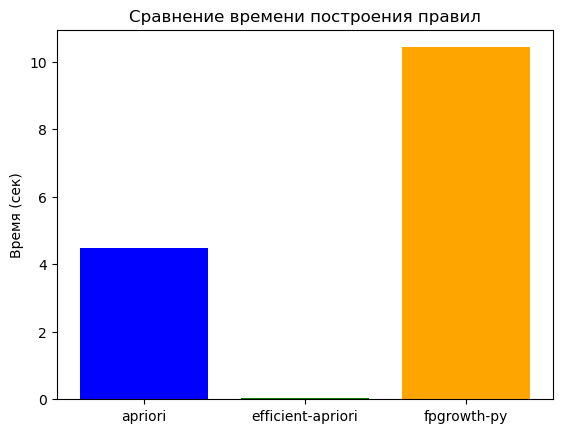

In [20]:
plt.bar(times.keys(), times.values(), color=['blue','green','orange'])
plt.ylabel("Время (сек)")
plt.title("Сравнение времени построения правил")
plt.show()